## E Navaneet Kumar

### Problem 2

In [2]:
import pandas as pd

file_path = 'EE627A_HW2_Q2.csv'
time_series_data = pd.read_csv(file_path)

time_series_data.head()


,0.8512
0,-2.0698
1,0.8185
2,-1.0678
3,2.3753
4,-0.1847


In [3]:
# Reload the CSV file without treating the first row as a header
time_series_data = pd.read_csv(file_path, header=None, names=['Value'])

time_series_data.head()


,Value
0,0.8512
1,-2.0698
2,0.8185
3,-1.0678
4,2.3753


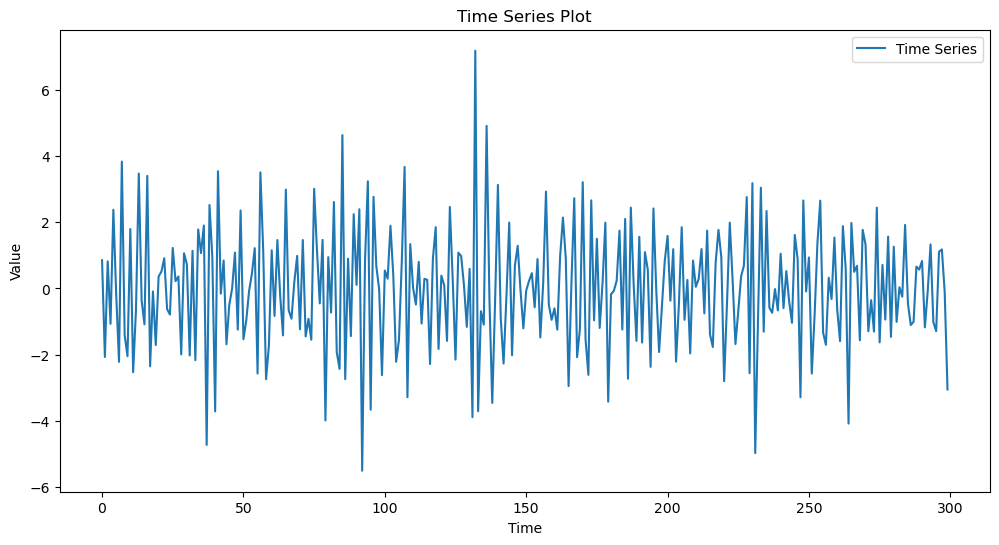

In [4]:
import matplotlib.pyplot as plt

# Plotting 
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Value'], label='Time Series')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
adf_test_result = adfuller(time_series_data['Value'])

adf_test_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

adf_test_statistic, p_value, critical_values


(-9.878475524182091,
 3.8258914686202037e-17,
 {'1%': -3.453261605529366,
  '5%': -2.87162848654246,
  '10%': -2.5721455328896603})

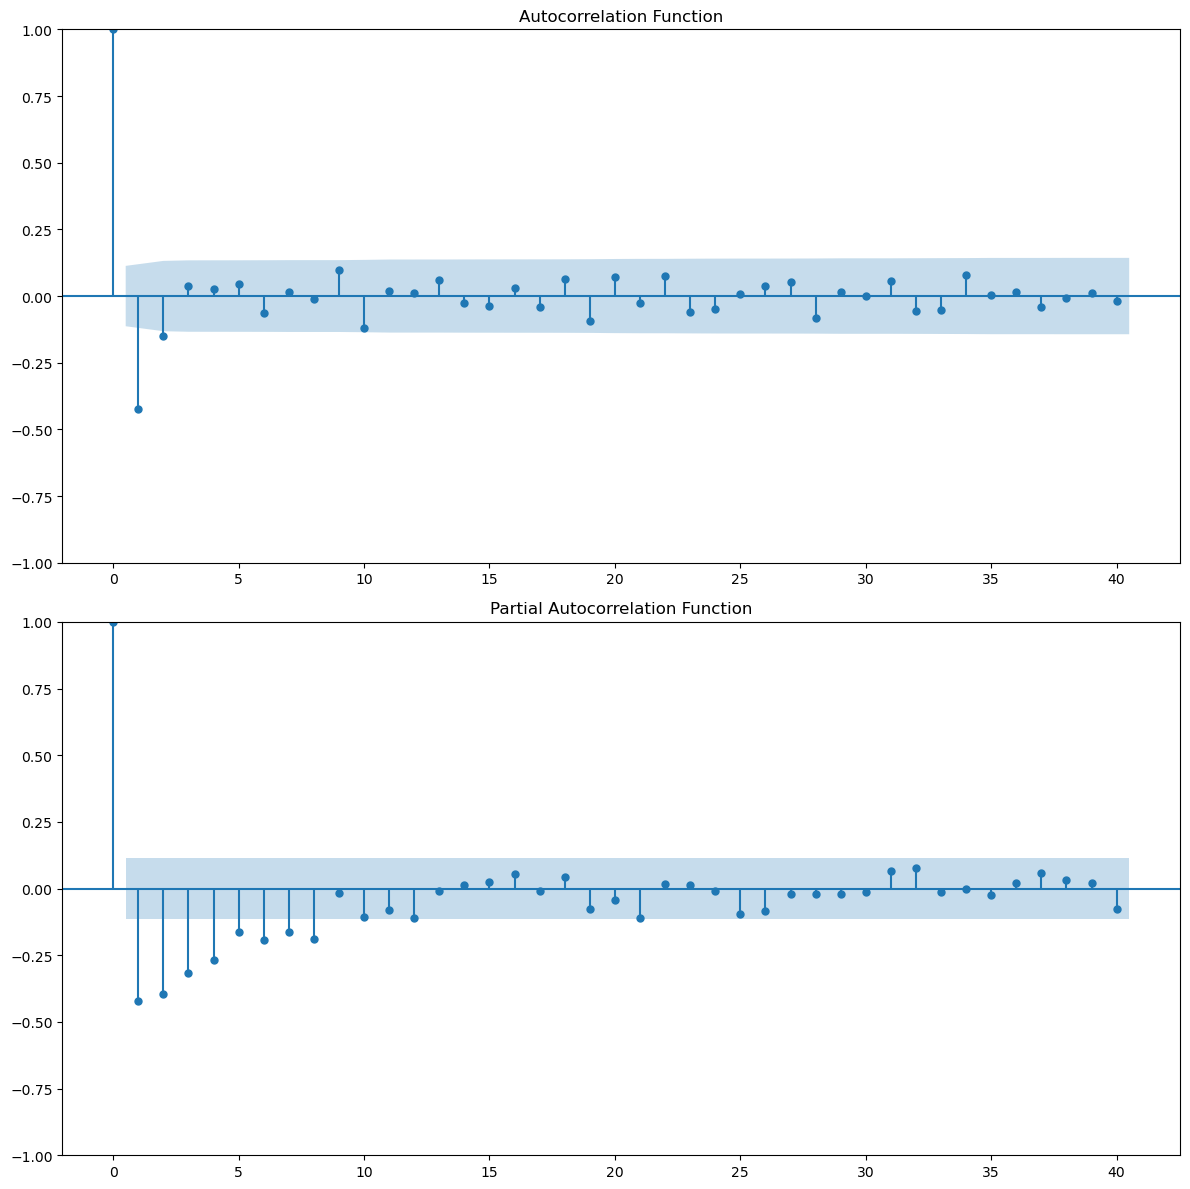

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# ACF plot
plot_acf(time_series_data['Value'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function')

# PACF plot
plot_pacf(time_series_data['Value'], ax=ax2, lags=40, method='ywm')
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def fit_evaluate_models(data, orders):
    results = []
    for order in orders:
        try:
            model = ARIMA(data, order=order)
            model_fit = model.fit()
            results.append((order, model_fit.aic))
        except Exception as e:
            results.append((order, np.inf))
            print(f"Failed to fit model with order {order}: {e}")
    return results

# AR(p), MA(q), ARMA(p, q)
orders = [
    (1, 0, 0),  # AR(1)
    (0, 1, 0),  # MA(1)
    (1, 0, 1),  # ARMA(1,1)
    (2, 0, 0),  # AR(2)
    (0, 2, 0),  # MA(2)
    (2, 0, 2)   # ARMA(2,2)
]

model_results = fit_evaluate_models(time_series_data['Value'], orders)

sorted_results = sorted(model_results, key=lambda x: x[1])

sorted_results


[((2, 0, 2), 994.3707961264007),
 ((1, 0, 1), 996.8951540410712),
 ((2, 0, 0), 1107.9795538253748),
 ((1, 0, 0), 1158.709259133173),
 ((0, 1, 0), 1522.582078537455),
 ((0, 2, 0), 1863.5131285780421)]

The ARMA(2,2) model has the lowest AIC value, indicating it might be the best model among the ones tested in terms of balancing model fit and complexity.Given these results, the ARMA(2,2) model appears to be the best predictive model for the given time series among the ones tested.